In [3]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/MyDrive/DCC Project/'


Mounted at /content/drive


In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

movies_df = pd.read_parquet(os.path.join(root, 'movies_embeddings.parquet'), engine='pyarrow')
songs_df = pd.read_parquet(os.path.join(root, 'song_embeddings.parquet'), engine='pyarrow')

In [5]:
movies_df.head()

,id,title,overview,genres,embedding
0,27205,Inception,Cobb a skilled thief who commits corporate esp...,"Action, Science Fiction, Adventure","[0.01589059643447399, 0.11273891478776932, -0...."
1,157336,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","[0.037922028452157974, -0.005655079614371061, ..."
2,155,The Dark Knight,Batman raises the stakes in his war on crime W...,"Drama, Action, Crime, Thriller","[0.011266704648733139, 0.032755907624959946, -..."
3,19995,Avatar,In the 22nd century a paraplegic Marine is dis...,"Action, Adventure, Fantasy, Science Fiction","[0.01744804158806801, 0.03436880186200142, 0.0..."
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","[0.027801260352134705, -0.019952325150370598, ..."


In [6]:
songs_df.head()

,title,tag,lyrics,embedding
0,Poor Poor Pitiful Me,country,Well I lay my head on the railroad track\nWait...,"[0.029062896966934204, 0.08223594725131989, -0..."
1,Cuckoos Nest,country,There is a thorn bush\nIn Outcolia\nThere is a...,"[0.0009067401406355202, -0.09515126794576645, ..."
2,Wedding Bells,country,I have the invitation that your sent me\nYou w...,"[0.04617173597216606, 0.013956493698060513, -0..."
3,Could Have Fooled Me,country,Im fading like the taillights\nOf a car that y...,"[0.015817370265722275, -0.0025993576273322105,..."
4,Shot of Glory,country,Its finally payday\nMeeting the boys at my pla...,"[-0.011555955745279789, 0.0511910654604435, 0...."


In [7]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519948 entries, 0 to 519947
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      519948 non-null  object
 1   tag        519948 non-null  object
 2   lyrics     519948 non-null  object
 3   embedding  519948 non-null  object
dtypes: object(4)
memory usage: 15.9+ MB


In [9]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend_movies(query_song_embedding, movies_df, top_k=5):
    # Convert movie embeddings to an array
    movie_embeddings = np.vstack(movies_df['embedding'].values)

    # Compute cosine similarity between the query song and all movie embeddings
    similarities = cosine_similarity([query_song_embedding], movie_embeddings)[0]

    # Get the indices of the top_k most similar movies
    top_indices = np.argsort(similarities)[::-1][:top_k]

    # Return the recommended movies with their similarity scores
    recommended_movies = movies_df.iloc[top_indices].copy()
    recommended_movies['similarity'] = similarities[top_indices]

    return recommended_movies


In [34]:
import random

# Randomly select 5 song indices
random_song_indices = random.sample(range(len(songs_df)), 5)
radom_song_embeddings = songs_df.iloc[random_song_indices]['embedding'].values
recommended_movies_embeddings = []
# Iterate through the randomly selected songs and recommend movies
for index in random_song_indices:
  random_song = songs_df.iloc[index]
  song_embedding = random_song['embedding']
  recommendations = recommend_movies(song_embedding, movies_df)
  recommended_movies_embeddings.append(recommendations['embedding'].values[0])
  print(f"Recommendations for song '{random_song['title']}'':")
  print(recommendations[['title', 'similarity']])
  print("-" * 30)


Recommendations for song 'Don Carlos Act 2 Scene 1'':
                        title  similarity
374925      The King of Spain    0.674567
485749       The Two Brothers    0.614773
193069                 Lovers    0.606475
62967             The Brigand    0.606442
88044   El amor de los amores    0.605546
------------------------------
Recommendations for song 'Internal Permafrost'':
                                       title  similarity
236148  Everyone Sees Noon At Their Own Door    0.604315
185616                          Tainted Love    0.596831
475570                            Surrender!    0.572419
523195                              Addicted    0.569674
212267              A World Without a Mirror    0.559047
------------------------------
Recommendations for song 'Love Is a Lonesome River'':
                  title  similarity
521535   Distant Lights    0.651937
185616     Tainted Love    0.637858
420395        São Jorge    0.635367
102409  Unrequited Love    0.633687
36083  

In [37]:
recommended_movies_embeddings[0].shape

(768,)

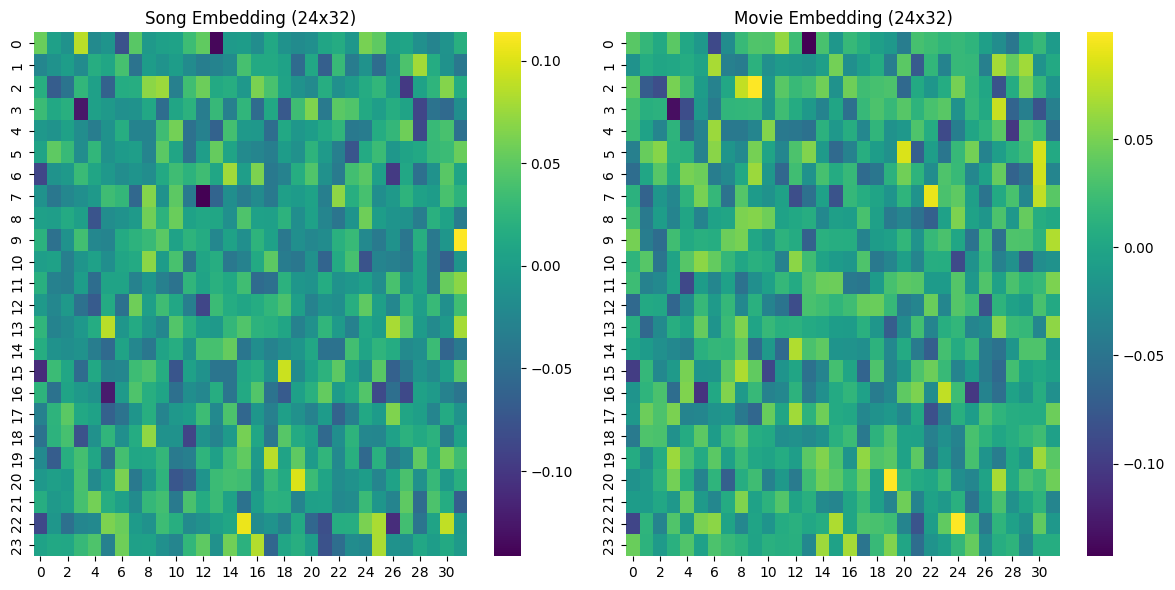

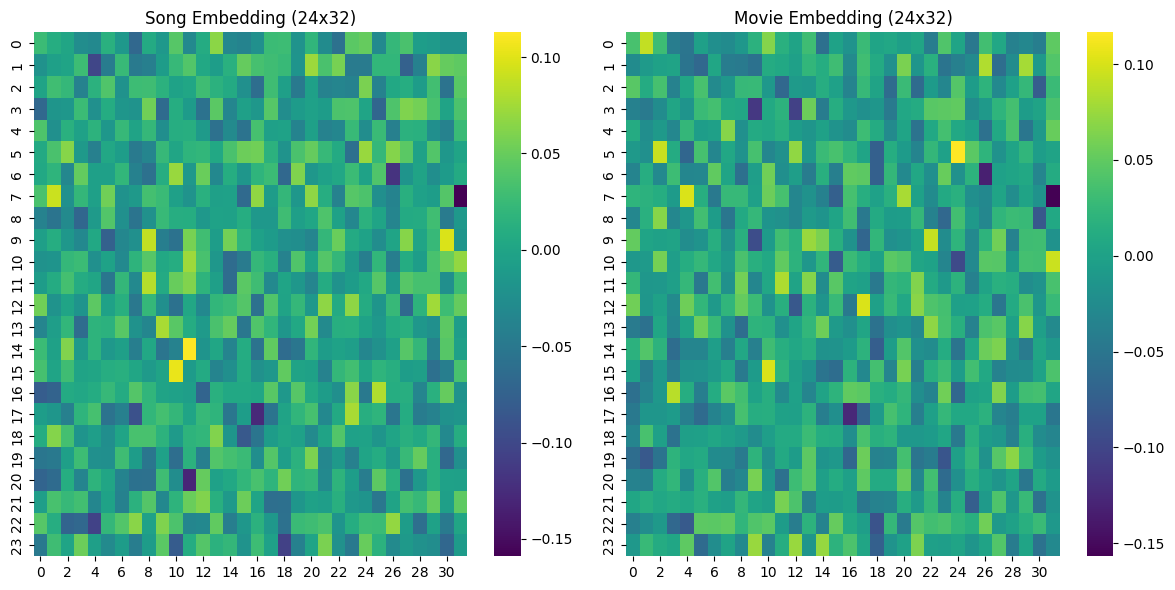

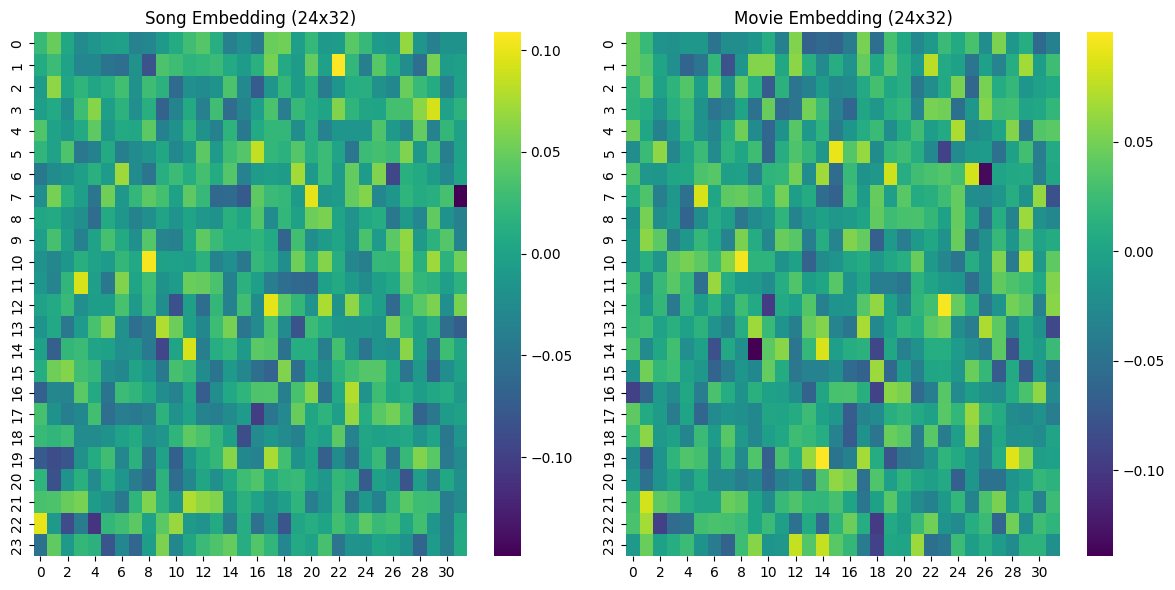

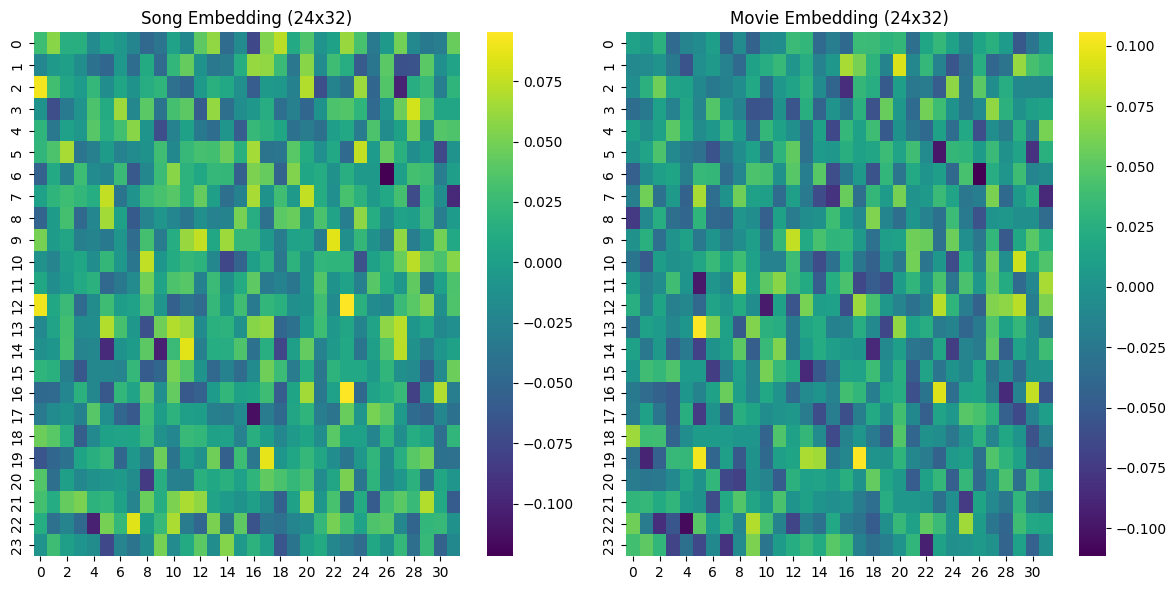

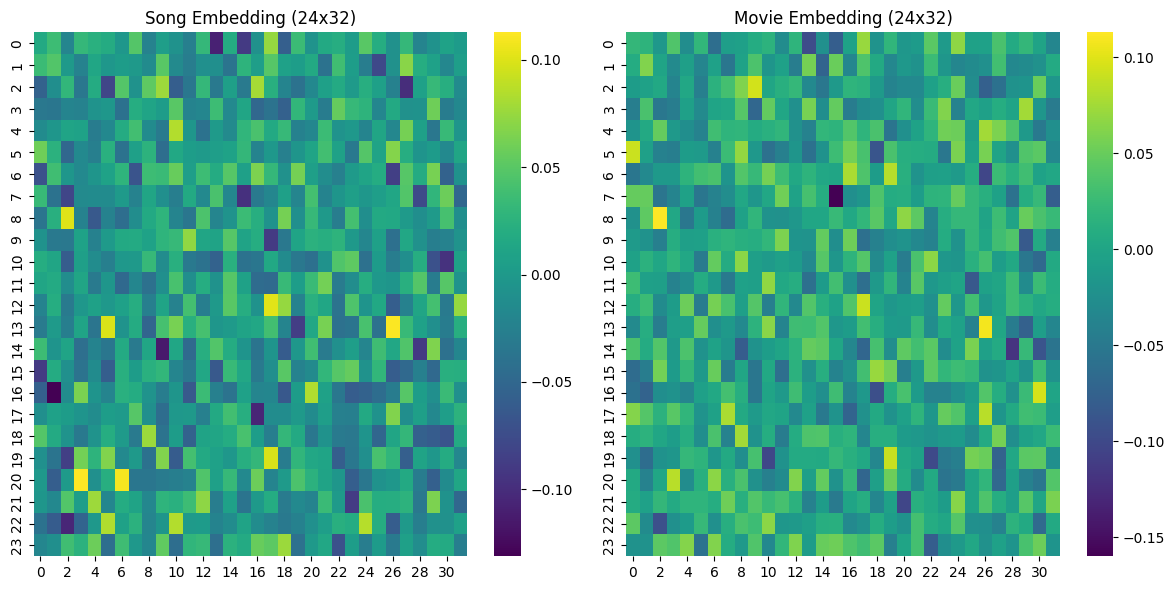

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for song_embedding, movie_embedding in zip(radom_song_embeddings, recommended_movies_embeddings):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Check if embedding size matches (32*24=768)
    # assert len(song_embedding) == 768, "Song embedding is not of length 768"
    # assert len(movie_embedding) == 768, "Movie embedding is not of length 768"

    # Reshape embeddings into 32*24
    song_embed_matrix = np.array(song_embedding).reshape(24, 32)
    movie_embed_matrix = np.array(movie_embedding).reshape(24, 32)

    # Plot song embedding heatmap
    sns.heatmap(song_embed_matrix, cmap='viridis', ax=axes[0])
    axes[0].set_title("Song Embedding (24x32)")

    # Plot movie embedding heatmap
    sns.heatmap(movie_embed_matrix, cmap='viridis', ax=axes[1])
    axes[1].set_title("Movie Embedding (24x32)")

    plt.tight_layout()
    plt.show()



In [46]:
songs_df['tag'].unique()

array(['country', 'misc', 'pop', 'rap', 'rb', 'rock'], dtype=object)

In [51]:
movies_df['genres'].dropna().str.split(',').explode().unique()

array(['Action', ' Science Fiction', ' Adventure', 'Adventure', ' Drama',
       'Drama', ' Action', ' Crime', ' Thriller', ' Fantasy',
       'Science Fiction', ' Comedy', 'Thriller', 'Comedy', ' Romance',
       ' Western', 'Crime', ' Mystery', ' War', 'Animation', ' Family',
       'Fantasy', 'Horror', 'Family', ' Animation', ' Music', 'Mystery',
       'Western', ' Horror', 'History', 'Music', ' History', 'War',
       'Romance', ' TV Movie', 'Documentary', ' Documentary', 'TV Movie'],
      dtype=object)

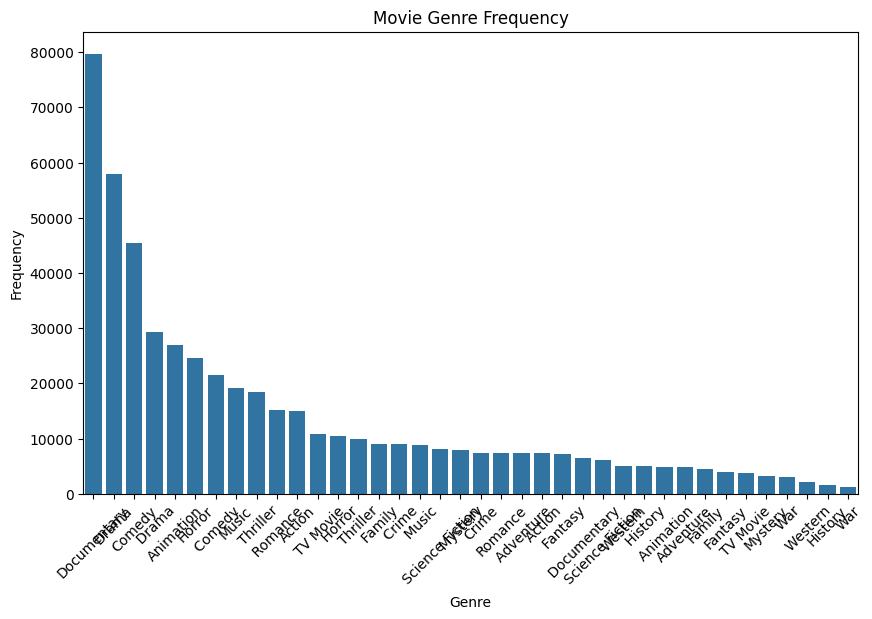

In [52]:
from collections import Counter

# Flatten the list of tags and count frequency
all_tags = movies_df['genres'].dropna().str.split(',').explode()
tag_counts = Counter(all_tags)

# Create a DataFrame for visualization

df_tags = pd.DataFrame(list(tag_counts.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_tags, x='Genre', y='Count')
plt.xticks(rotation=45)
plt.title('Movie Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()
